In [1]:
from google.colab import files
files.upload()   # select sales_data.csv


Saving sales_data.csv to sales_data.csv


{'sales_data.csv': b'Date,Sales\r\n2020-01,220\r\n2020-02,235\r\n2020-03,210\r\n2020-04,190\r\n2020-05,250\r\n2020-06,300\r\n2020-07,320\r\n2020-08,310\r\n2020-09,280\r\n2020-10,350\r\n2020-11,400\r\n2020-12,420\r\n2021-01,240\r\n2021-02,260\r\n2021-03,270\r\n2021-04,300\r\n2021-05,330\r\n2021-06,360\r\n2021-07,400\r\n2021-08,420\r\n2021-09,410\r\n2021-10,450\r\n2021-11,480\r\n2021-12,500\r\n'}

In [2]:
!pip install prophet
import pandas as pd, os, matplotlib.pyplot as plt
from prophet import Prophet

os.makedirs("results", exist_ok=True)


In [3]:
df = pd.read_csv("sales_data.csv")
print(df.head())

df["Date"] = pd.to_datetime(df["Date"])
df_p = df.rename(columns={"Date":"ds","Sales":"y"})



      Date  Sales
0  2020-01    220
1  2020-02    235
2  2020-03    210
3  2020-04    190
4  2020-05    250


In [4]:
m = Prophet()
m.fit(df_p)

future = m.make_future_dataframe(periods=12, freq="M")
fcst = m.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpocv8ecpv/c3nfrpdo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpocv8ecpv/0hlqn5lm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29208', 'data', 'file=/tmp/tmpocv8ecpv/c3nfrpdo.json', 'init=/tmp/tmpocv8ecpv/0hlqn5lm.json', 'output', 'file=/tmp/tmpocv8ecpv/prophet_modelz2z4k5c_/prophet_model-20250909141920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:19:20 - cmdstanpy - INFO - Chain [1] start processing
I

,ds,yhat,yhat_lower,yhat_upper
31,2022-07-31,527.361777,463.579135,588.711916
32,2022-08-31,537.737980,472.297588,608.948942
33,2022-09-30,547.779467,482.393830,615.726446
34,2022-10-31,558.155671,495.854047,628.666924
35,2022-11-30,568.197158,500.213805,631.363977


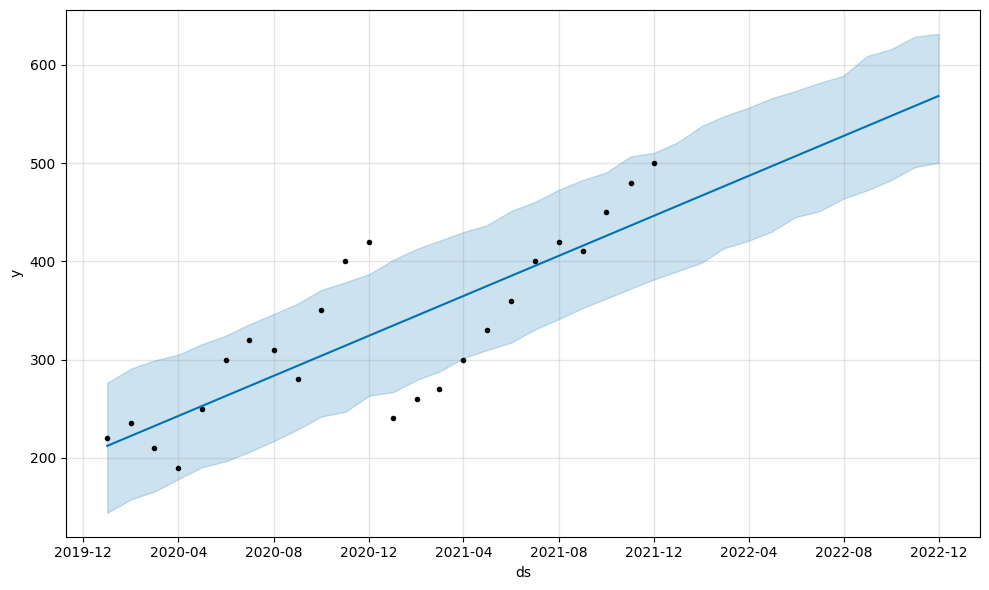

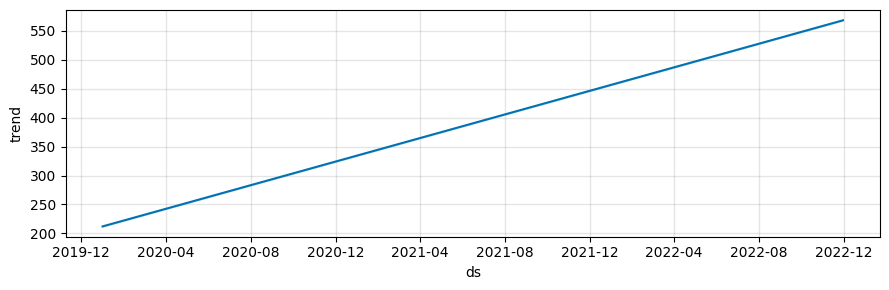

In [5]:
fig1 = m.plot(fcst)
fig2 = m.plot_components(fcst)

fig1.savefig("results/forecast_plot.png")
fig2.savefig("results/components_plot.png")

fcst[["ds","yhat","yhat_lower","yhat_upper"]].tail()
